In [5]:
import time
import matplotlib.pyplot as plt
from good_sorts import merge, mergesort
from bad_sorts import create_random_list

In [6]:
def bottom_up_merge_sort(arr):
    if len(arr) <= 1:
        return arr

    width = 1
    n = len(arr)
    while width < n:
        for i in range(0, n, 2 * width):
            left = arr[i:i + width]
            right = arr[i + width:i + 2 * width]
            arr[i:i + 2 * width] = merge(left, right)
        width *= 2
    return arr

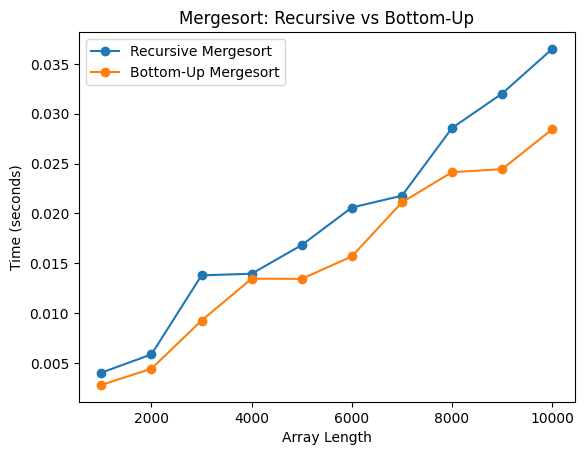

In [8]:
# Comparing times
lengths = [n * 1000 for n in range (1, 11)]  # from 1000 to 10000 in steps of 1000
times_recursive = []
times_bottom_up = []

for length in lengths:
    arr = create_random_list(length, 512)

    start_time = time.time()
    mergesort(arr.copy())
    times_recursive.append(time.time() - start_time)

    start_time = time.time()
    bottom_up_merge_sort(arr.copy())
    times_bottom_up.append(time.time() - start_time)

# Plotting the results
plt.plot(lengths, times_recursive, label='Recursive Mergesort', marker='o')
plt.plot(lengths, times_bottom_up, label='Bottom-Up Mergesort', marker='o')
plt.xlabel('Array Length')
plt.ylabel('Time (seconds)')
plt.title('Mergesort: Recursive vs Bottom-Up')
plt.legend()
